Biodiversity in National Parks Project

Scope: Analyze data about endangered species from various national parks to look for patterns in what types of animals become endangered and locations of endangered species.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Read csv files
observations_df = pd.read_csv('observations.csv')
species_df = pd.read_csv('species_info.csv')

In [3]:
# Inspect observation data
print(observations_df.head())
observations_df.info()
observations_df.describe()
observations_df.drop_duplicates(subset = 'scientific_name', inplace = True)

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


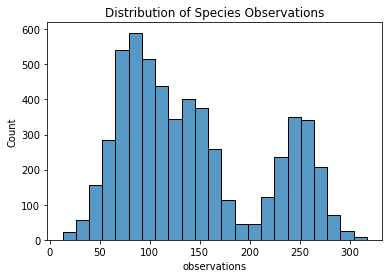

<Figure size 432x288 with 0 Axes>

In [4]:
# Plot distribution of observations
sns.histplot(x = observations_df.observations)
plt.title('Distribution of Species Observations')
plt.show()
plt.clf()

In [5]:
# Inspect species data
print(species_df.head())
species_df.info()
species_df.describe()
species_df.drop_duplicates(inplace = True)

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      

In [6]:
species_df.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [7]:
species_df.fillna('No Intervention', inplace = True)

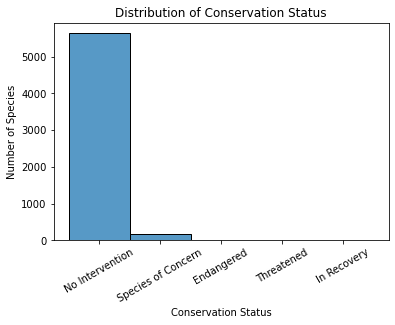

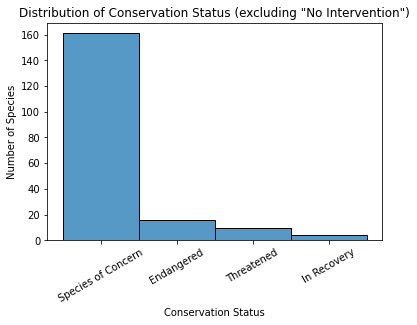

<Figure size 432x288 with 0 Axes>

In [8]:
# Plot distribution of conservation status
sns.histplot(x = species_df.conservation_status)
plt.title('Distribution of Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.xticks(rotation = 30)
plt.show()
plt.clf()

sns.histplot(x = species_df.conservation_status[species_df.conservation_status != 'No Intervention'])
plt.title('Distribution of Conservation Status (excluding "No Intervention")')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.xticks(rotation = 30)
plt.show()
plt.clf()

The majority of the species observed is not of concern for conservation purposes. Of the species that are of some concern, around 160 are Species of Concern, while approximately 15 are Endangered, approximately 10 are Threatened, and approximately 5 are In Recovery.

In [9]:
species_category = species_df[species_df.conservation_status != 'No Intervention'].groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()
species_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


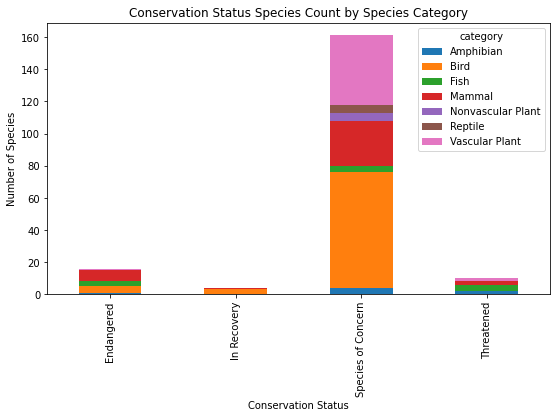

<Figure size 432x288 with 0 Axes>

In [10]:
ax = species_category.plot(kind = 'bar', stacked = True, figsize = (9, 5))
plt.title('Conservation Status Species Count by Species Category')
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Number of Species')
plt.show()
plt.clf()

The vast majority of the observed species are Species of Concern. This is the only conservation category that contains species from all 7 species categories. The Endangered category includes mammals, vascular plants, fish, birds, nonvascular plants, and amphibians. In Recovery includes birds and mammals. Threatened contains vascular plants, mammals, fish, and amphibians.

Mammals and birds are the most likely to be endangered.

In [12]:
# Observed frequency table
species_df['is_protected'] = species_df.conservation_status != 'No Intervention'
category_counts = species_df.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index().pivot(columns = 'is_protected', index = 'category', values = 'scientific_name').reset_index()
category_counts.columns = ['category', 'protected', 'not protected']
category_counts

,category,protected,not protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [14]:
from scipy.stats import chi2_contingency